In [685]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action= "ignore")

In [686]:
data = data = pd.read_csv(r"F:\anaconda\ML ineuron\Decision tree\winequality_red.csv")
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [687]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [688]:
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Lets try building model with this imbalanced data set

In [689]:
X = data.drop("quality", axis = 1)
y = data.quality

In [690]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [691]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 0)

In [692]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [693]:
print("Training accuracy",dt.score(X_train, y_train))
print("Testing accuracy", dt.score(X_test, y_test))

Training accuracy 1.0
Testing accuracy 0.69375


As training data was unbalanced, model is over fitted, lets try balancing the data and then fitting the model

In [694]:
y_train.value_counts()

5    546
6    496
7    172
4     42
8     15
3      8
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

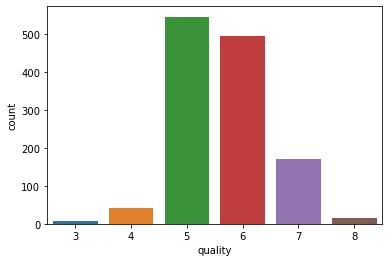

In [695]:
sns.countplot(y_train)

In [696]:
from sklearn.model_selection import GridSearchCV

In [697]:
y_train.shape

(1279,)

In [698]:
y_train.value_counts()

5    546
6    496
7    172
4     42
8     15
3      8
Name: quality, dtype: int64

In [699]:
y_train.shape

(1279,)

In [700]:
series = y_train.shape[0]/y_train.value_counts()
series

5      2.342491
6      2.578629
7      7.436047
4     30.452381
8     85.266667
3    159.875000
Name: quality, dtype: float64

In [701]:
d = dict([(idx, series[idx]) for idx in series.index])
d

{5: 2.3424908424908426,
 6: 2.5786290322580645,
 7: 7.436046511627907,
 4: 30.452380952380953,
 8: 85.26666666666667,
 3: 159.875}

In [702]:
dt = DecisionTreeClassifier(class_weight=d, random_state=0)

In [703]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={3: 159.875, 4: 30.452380952380953,
                                     5: 2.3424908424908426,
                                     6: 2.5786290322580645,
                                     7: 7.436046511627907,
                                     8: 85.26666666666667},
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=0, splitter='best')

In [704]:
print("Training accuracy",dt.score(X_train, y_train))
print("Testing accuracy", dt.score(X_test, y_test))

Training accuracy 1.0
Testing accuracy 0.60625


model is still over fitted with balanced class, lets try pruning

In [705]:
max_depth = 15

In [706]:
dt1 = DecisionTreeClassifier(class_weight=d, random_state=0, max_depth= max_depth)

In [707]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={3: 159.875, 4: 30.452380952380953,
                                     5: 2.3424908424908426,
                                     6: 2.5786290322580645,
                                     7: 7.436046511627907,
                                     8: 85.26666666666667},
                       criterion='gini', max_depth=15, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=0, splitter='best')

In [708]:
print("Training accuracy",dt1.score(X_train, y_train))
print("Testing accuracy", dt1.score(X_test, y_test))

Training accuracy 0.9773260359655981
Testing accuracy 0.60625


with max depth of 15 model is over fitting., so lets try grid search for best params

In [709]:
grid_params = {'max_features': range(3,12),
         'criterion':['gini','entropy'],
          'max_depth' : range(10,50),
        #'min_samples_leaf' : np.arange(20,100,10)
              }

In [710]:
grid = GridSearchCV(dt, param_grid=grid_params, n_jobs=-1, cv =3)

In [711]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight={3: 159.875,
                                                            4: 30.452380952380953,
                                                            5: 2.3424908424908426,
                                                            6: 2.5786290322580645,
                                                            7: 7.436046511627907,
                                                            8: 85.26666666666667},
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                        

In [712]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 18, 'max_features': 4}

In [713]:
dt2 = grid.best_estimator_

In [714]:
dt2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={3: 159.875, 4: 30.452380952380953,
                                     5: 2.3424908424908426,
                                     6: 2.5786290322580645,
                                     7: 7.436046511627907,
                                     8: 85.26666666666667},
                       criterion='gini', max_depth=18, max_features=4,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=0, splitter='best')

In [715]:
print("Training accuracy",dt2.score(X_train, y_train))
print("Testing accuracy", dt2.score(X_test, y_test))

Training accuracy 0.9749804534792806
Testing accuracy 0.61875


Lets try randomised searchCV

In [765]:
params = {'max_features': range(3,6),
         'criterion':['gini','entropy'],
          'max_depth' : range(10,500),
        'min_samples_leaf' : np.arange(2,1000,100)
         }

In [766]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(dt,
                          param_distributions=params,
                         n_iter=50,
                          n_jobs=-1,
                          random_state=0,
                          cv =5
                            )

In [767]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight={3: 159.875,
                                                                  4: 30.452380952380953,
                                                                  5: 2.3424908424908426,
                                                                  6: 2.5786290322580645,
                                                                  7: 7.436046511627907,
                                                                  8: 85.26666666666667},
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_imp

In [768]:
rscv.best_params_

{'min_samples_leaf': 2,
 'max_features': 3,
 'max_depth': 350,
 'criterion': 'gini'}

In [769]:
rscv.best_score_

0.5559030492572322

In [770]:
dt3 = rscv.best_estimator_

In [771]:
print("Training accuracy",dt3.score(X_train, y_train))
print("Testing accuracy", dt3.score(X_test, y_test))

Training accuracy 0.8850664581704457
Testing accuracy 0.55


Lets Try random forest

In [772]:
from sklearn.ensemble import RandomForestClassifier

In [812]:
rf1 = RandomForestClassifier(n_estimators=200,class_weight=d,random_state=0, max_depth=10)

In [813]:
rf1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True,
                       class_weight={3: 159.875, 4: 30.452380952380953,
                                     5: 2.3424908424908426,
                                     6: 2.5786290322580645,
                                     7: 7.436046511627907,
                                     8: 85.26666666666667},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [814]:
print("Training accuracy",rf1.score(X_train, y_train))
print("Testing accuracy", rf1.score(X_test, y_test))

Training accuracy 0.9585613760750586
Testing accuracy 0.68125


In [815]:
grid_params = {'min_samples_leaf': range(2,100,10),
         'max_features': range(3,10,1),
         'max_depth': range(2,40,10),
         }

Lets try GridsearchCV on random forest

In [816]:
grid = GridSearchCV(rf, param_grid=grid_params, n_jobs=-1, cv=5)

In [817]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth'

In [818]:
rf2 = grid.best_estimator_

In [819]:
print("Training accuracy",rf2.score(X_train, y_train))
print("Testing accuracy", rf2.score(X_test, y_test))

Training accuracy 0.9405785770132916
Testing accuracy 0.690625


Lets try randomized search CV

In [912]:
params = {"max_depth" : range(2,20,1),
         "min_samples_leaf" : range(2,10,1),
         "min_samples_split" : range(2,30,1)
         }

In [913]:
rscv = RandomizedSearchCV(rf2,param_distributions=params, n_iter=500, n_jobs=-1 )

In [914]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=22,
                                                    max_features=6,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=2,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=10,
                                                    n_jobs=None,
    

In [915]:
rscv.best_params_

{'min_samples_split': 7, 'min_samples_leaf': 2, 'max_depth': 18}

In [916]:
rf3 = rscv.best_estimator_

In [917]:
print("Training accuracy",rf3.score(X_train, y_train))
print("Testing accuracy", rf3.score(X_test, y_test))

Training accuracy 0.8960125097732604
Testing accuracy 0.690625
